<a href="https://colab.research.google.com/github/ArpanSM/Machine_Learning_Hackathons/blob/master/Domain_Network_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]
!pip install featurewiz
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!cp '/content/drive/MyDrive/Work/Datasets/NMIMS_Datathon/train.csv' '/content/'
!cp '/content/drive/MyDrive/Work/Datasets/NMIMS_Datathon/test.csv' '/content/'
!cp '/content/drive/MyDrive/Work/Datasets/NMIMS_Datathon/sample submission.csv' '/content/'

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/train.csv")
dft = pd.read_csv("/content/test.csv")
sub = pd.read_csv("/content/sample submission.csv")
df.Action.replace(['allow', 'deny', 'drop', 'reset-both'], [0, 1, 2, 3], inplace=True)

df["Bytes"].fillna(df['Bytes Received']+ df['Bytes Sent'], inplace = True)
df["Bytes Received"].fillna(df['Bytes'] -  df['Bytes Sent'], inplace = True)
df["Bytes Sent"].fillna(df['Bytes'] -  df['Bytes Received'], inplace = True)
df["Packets"].fillna(df['pkts_sent']+ df['pkts_received'], inplace = True)
df["pkts_received"].fillna(df['Packets'] -  df['pkts_sent'], inplace = True)
df["pkts_sent"].fillna(df['Packets'] -  df['pkts_received'], inplace = True)

dft["Bytes"].fillna(dft['Bytes Received']+ dft['Bytes Sent'], inplace = True)
dft["Bytes Received"].fillna(dft['Bytes'] -  dft['Bytes Sent'], inplace = True)
dft["Bytes Sent"].fillna(dft['Bytes'] -  dft['Bytes Received'], inplace = True)
dft["Packets"].fillna(dft['pkts_sent']+ dft['pkts_received'], inplace = True)
dft["pkts_received"].fillna(dft['Packets'] -  dft['pkts_sent'], inplace = True)
dft["pkts_sent"].fillna(dft['Packets'] -  dft['pkts_received'], inplace = True)

dfx = df.loc[df.isnull().mean(axis=1).lt(0.15)]
dfx.shape

(27208, 13)

In [ ]:
dfx["Source Port_Mean"] = dfx.groupby('Source Port')["Bytes"].transform('mean')
Source_Port_Mean_mean_dict = dfx.groupby(['Source Port'])['Bytes'].mean().to_dict()
dft['Source Port_Mean'] = dft['Source Port'].apply(lambda x:Source_Port_Mean_mean_dict.get(x,0))
dfx["Source Port_min"] = dfx.groupby('Source Port')["Bytes"].transform('min')
Source_Port_min_min_dict = dfx.groupby(['Source Port'])['Bytes'].min().to_dict()
dft['Source Port_min'] = dft['Source Port'].apply(lambda x:Source_Port_min_min_dict.get(x,0))
dfx["Source Port_max"] = dfx.groupby('Source Port')["Bytes"].transform('max')
Source_Port_max_max_dict = dfx.groupby(['Source Port'])['Bytes'].max().to_dict()
dft['Source Port_max'] = dft['Source Port'].apply(lambda x:Source_Port_max_max_dict.get(x,0))
dfx["Source Port_count"] = dfx.groupby('Source Port')["Bytes"].transform('count')
Source_Port_count_count_dict = dfx.groupby(['Source Port'])['Bytes'].count().to_dict()
dft['Source Port_count'] = dft['Source Port'].apply(lambda x:Source_Port_count_count_dict.get(x,0))

dfx["Destination Port_Mean"] = dfx.groupby('Destination Port')["Bytes"].transform('mean')
Destination_Port_Mean_mean_dict = dfx.groupby(['Destination Port'])['Bytes'].mean().to_dict()
dft['Destination Port_Mean'] = dft['Destination Port'].apply(lambda x:Destination_Port_Mean_mean_dict.get(x,0))
dfx["Destination Port_min"] = dfx.groupby('Destination Port')["Bytes"].transform('min')
Destination_Port_min_min_dict = dfx.groupby(['Destination Port'])['Bytes'].min().to_dict()
dft['Destination Port_min'] = dft['Destination Port'].apply(lambda x:Destination_Port_min_min_dict.get(x,0))
dfx["Destination Port_max"] = dfx.groupby('Destination Port')["Bytes"].transform('max')
Destination_Port_max_max_dict = dfx.groupby(['Destination Port'])['Bytes'].max().to_dict()
dft['Destination Port_max'] = dft['Destination Port'].apply(lambda x:Destination_Port_max_max_dict.get(x,0))
dfx["Destination Port_count"] = dfx.groupby('Destination Port')["Bytes"].transform('count')
Destination_Port_count_count_dict = dfx.groupby(['Destination Port'])['Bytes'].count().to_dict()
dft['Destination Port_count'] = dft['Destination Port'].apply(lambda x:Destination_Port_count_count_dict.get(x,0))

dfx["NAT Source Port_Mean"] = dfx.groupby('NAT Source Port')["Bytes"].transform('mean')
NAT_Source_Port_Mean_mean_dict = dfx.groupby(['NAT Source Port'])['Bytes'].mean().to_dict()
dft['NAT Source Port_Mean'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_Mean_mean_dict.get(x,0))
dfx["NAT Source Port_min"] = dfx.groupby('NAT Source Port')["Bytes"].transform('min')
NAT_Source_Port_min_min_dict = dfx.groupby(['NAT Source Port'])['Bytes'].min().to_dict()
dft['NAT Source Port_min'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_min_min_dict.get(x,0))
dfx["NAT Source Port_max"] = dfx.groupby('NAT Source Port')["Bytes"].transform('max')
NAT_Source_Port_max_max_dict = dfx.groupby(['NAT Source Port'])['Bytes'].max().to_dict()
dft['NAT Source Port_max'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_max_max_dict.get(x,0))
dfx["NAT Source Port_count"] = dfx.groupby('NAT Source Port')["Bytes"].transform('count')
NAT_Source_Port_count_count_dict = dfx.groupby(['NAT Source Port'])['Bytes'].count().to_dict()
dft['NAT Source Port_count'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_count_count_dict.get(x,0))
 
dfx["NAT Destination Port_Mean"] = dfx.groupby('NAT Destination Port')["Bytes"].transform('mean')
NAT_Destination_Port_Mean_mean_dict = dfx.groupby(['NAT Destination Port'])['Bytes'].mean().to_dict()
dft['NAT Destination Port_Mean'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_Mean_mean_dict.get(x,0))
dfx["NAT Destination Port_min"] = dfx.groupby('NAT Destination Port')["Bytes"].transform('min')
NAT_Destination_Port_min_min_dict = dfx.groupby(['NAT Destination Port'])['Bytes'].min().to_dict()
dft['NAT Destination Port_min'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_min_min_dict.get(x,0))
dfx["NAT Destination Port_max"] = dfx.groupby('NAT Destination Port')["Bytes"].transform('max')
NAT_Destination_Port_max_max_dict = dfx.groupby(['NAT Destination Port'])['Bytes'].max().to_dict()
dft['NAT Destination Port_max'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_max_max_dict.get(x,0))
dfx["NAT Destination Port_count"] = dfx.groupby('NAT Destination Port')["Bytes"].transform('count')
NAT_Destination_Port_count_count_dict = dfx.groupby(['NAT Destination Port'])['Bytes'].count().to_dict()
dft['NAT Destination Port_count'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_count_count_dict.get(x,0))

dfx["Packets_Mean"] = dfx.groupby('Packets')["Bytes"].transform('mean')
Packets_Mean_mean_dict = dfx.groupby(['Packets'])['Bytes'].mean().to_dict()
dft['Packets_Mean'] = dft['Packets'].apply(lambda x:Packets_Mean_mean_dict.get(x,0))
dfx["Packets_min"] = dfx.groupby('Packets')["Bytes"].transform('min')
Packets_min_min_dict = dfx.groupby(['Packets'])['Bytes'].min().to_dict()
dft['Packets_min'] = dft['Packets'].apply(lambda x:Packets_min_min_dict.get(x,0))
dfx["Packets_max"] = dfx.groupby('Packets')["Bytes"].transform('max')
Packets_max_max_dict = dfx.groupby(['Packets'])['Bytes'].max().to_dict()
dft['Packets_max'] = dft['Packets'].apply(lambda x:Packets_max_max_dict.get(x,0))
dfx["Packets_count"] = dfx.groupby('Packets')["Bytes"].transform('count')
Packets_count_count_dict = dfx.groupby(['Packets'])['Bytes'].count().to_dict()
dft['Packets_count'] = dft['Packets'].apply(lambda x:Packets_count_count_dict.get(x,0))

dfx["Source Port_Mean"] = dfx.groupby('Source Port')["Elapsed Time (sec)"].transform('mean')
Source_Port_Mean_mean_dict = dfx.groupby(['Source Port'])['Elapsed Time (sec)'].mean().to_dict()
dft['Source Port_Mean'] = dft['Source Port'].apply(lambda x:Source_Port_Mean_mean_dict.get(x,0))
dfx["Source Port_min"] = dfx.groupby('Source Port')["Elapsed Time (sec)"].transform('min')
Source_Port_min_min_dict = dfx.groupby(['Source Port'])['Elapsed Time (sec)'].min().to_dict()
dft['Source Port_min'] = dft['Source Port'].apply(lambda x:Source_Port_min_min_dict.get(x,0))
dfx["Source Port_max"] = dfx.groupby('Source Port')["Elapsed Time (sec)"].transform('max')
Source_Port_max_max_dict = dfx.groupby(['Source Port'])['Elapsed Time (sec)'].max().to_dict()
dft['Source Port_max'] = dft['Source Port'].apply(lambda x:Source_Port_max_max_dict.get(x,0))
dfx["Source Port_count"] = dfx.groupby('Source Port')["Elapsed Time (sec)"].transform('count')
Source_Port_count_count_dict = dfx.groupby(['Source Port'])['Elapsed Time (sec)'].count().to_dict()
dft['Source Port_count'] = dft['Source Port'].apply(lambda x:Source_Port_count_count_dict.get(x,0))
 
dfx["Destination Port_Mean"] = dfx.groupby('Destination Port')["Elapsed Time (sec)"].transform('mean')
Destination_Port_Mean_mean_dict = dfx.groupby(['Destination Port'])['Elapsed Time (sec)'].mean().to_dict()
dft['Destination Port_Mean'] = dft['Destination Port'].apply(lambda x:Destination_Port_Mean_mean_dict.get(x,0))
dfx["Destination Port_min"] = dfx.groupby('Destination Port')["Elapsed Time (sec)"].transform('min')
Destination_Port_min_min_dict = dfx.groupby(['Destination Port'])['Elapsed Time (sec)'].min().to_dict()
dft['Destination Port_min'] = dft['Destination Port'].apply(lambda x:Destination_Port_min_min_dict.get(x,0))
dfx["Destination Port_max"] = dfx.groupby('Destination Port')["Elapsed Time (sec)"].transform('max')
Destination_Port_max_max_dict = dfx.groupby(['Destination Port'])['Elapsed Time (sec)'].max().to_dict()
dft['Destination Port_max'] = dft['Destination Port'].apply(lambda x:Destination_Port_max_max_dict.get(x,0))
dfx["Destination Port_count"] = dfx.groupby('Destination Port')["Elapsed Time (sec)"].transform('count')
Destination_Port_count_count_dict = dfx.groupby(['Destination Port'])['Elapsed Time (sec)'].count().to_dict()
dft['Destination Port_count'] = dft['Destination Port'].apply(lambda x:Destination_Port_count_count_dict.get(x,0))
 
dfx["NAT Source Port_Mean"] = dfx.groupby('NAT Source Port')["Elapsed Time (sec)"].transform('mean')
NAT_Source_Port_Mean_mean_dict = dfx.groupby(['NAT Source Port'])['Elapsed Time (sec)'].mean().to_dict()
dft['NAT Source Port_Mean'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_Mean_mean_dict.get(x,0))
dfx["NAT Source Port_min"] = dfx.groupby('NAT Source Port')["Elapsed Time (sec)"].transform('min')
NAT_Source_Port_min_min_dict = dfx.groupby(['NAT Source Port'])['Elapsed Time (sec)'].min().to_dict()
dft['NAT Source Port_min'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_min_min_dict.get(x,0))
dfx["NAT Source Port_max"] = dfx.groupby('NAT Source Port')["Elapsed Time (sec)"].transform('max')
NAT_Source_Port_max_max_dict = dfx.groupby(['NAT Source Port'])['Elapsed Time (sec)'].max().to_dict()
dft['NAT Source Port_max'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_max_max_dict.get(x,0))
dfx["NAT Source Port_count"] = dfx.groupby('NAT Source Port')["Elapsed Time (sec)"].transform('count')
NAT_Source_Port_count_count_dict = dfx.groupby(['NAT Source Port'])['Elapsed Time (sec)'].count().to_dict()
dft['NAT Source Port_count'] = dft['NAT Source Port'].apply(lambda x:NAT_Source_Port_count_count_dict.get(x,0))

dfx["NAT Destination Port_Mean"] = dfx.groupby('NAT Destination Port')["Elapsed Time (sec)"].transform('mean')
NAT_Destination_Port_Mean_mean_dict = dfx.groupby(['NAT Destination Port'])['Elapsed Time (sec)'].mean().to_dict()
dft['NAT Destination Port_Mean'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_Mean_mean_dict.get(x,0))
dfx["NAT Destination Port_min"] = dfx.groupby('NAT Destination Port')["Elapsed Time (sec)"].transform('min')
NAT_Destination_Port_min_min_dict = dfx.groupby(['NAT Destination Port'])['Elapsed Time (sec)'].min().to_dict()
dft['NAT Destination Port_min'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_min_min_dict.get(x,0))
dfx["NAT Destination Port_max"] = dfx.groupby('NAT Destination Port')["Elapsed Time (sec)"].transform('max')
NAT_Destination_Port_max_max_dict = dfx.groupby(['NAT Destination Port'])['Elapsed Time (sec)'].max().to_dict()
dft['NAT Destination Port_max'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_max_max_dict.get(x,0))
dfx["NAT Destination Port_count"] = dfx.groupby('NAT Destination Port')["Elapsed Time (sec)"].transform('count')
NAT_Destination_Port_count_count_dict = dfx.groupby(['NAT Destination Port'])['Elapsed Time (sec)'].count().to_dict()
dft['NAT Destination Port_count'] = dft['NAT Destination Port'].apply(lambda x:NAT_Destination_Port_count_count_dict.get(x,0))
 
dfx["Packets_Mean"] = dfx.groupby('Packets')["Elapsed Time (sec)"].transform('mean')
Packets_Mean_mean_dict = dfx.groupby(['Packets'])['Elapsed Time (sec)'].mean().to_dict()
dft['Packets_Mean'] = dft['Packets'].apply(lambda x:Packets_Mean_mean_dict.get(x,0))
dfx["Packets_min"] = dfx.groupby('Packets')["Elapsed Time (sec)"].transform('min')
Packets_min_min_dict = dfx.groupby(['Packets'])['Elapsed Time (sec)'].min().to_dict()
dft['Packets_min'] = dft['Packets'].apply(lambda x:Packets_min_min_dict.get(x,0))
dfx["Packets_max"] = dfx.groupby('Packets')["Elapsed Time (sec)"].transform('max')
Packets_max_max_dict = dfx.groupby(['Packets'])['Elapsed Time (sec)'].max().to_dict()
dft['Packets_max'] = dft['Packets'].apply(lambda x:Packets_max_max_dict.get(x,0))
dfx["Packets_count"] = dfx.groupby('Packets')["Elapsed Time (sec)"].transform('count')
Packets_count_count_dict = dfx.groupby(['Packets'])['Elapsed Time (sec)'].count().to_dict()
dft['Packets_count'] = dft['Packets'].apply(lambda x:Packets_count_count_dict.get(x,0))

In [ ]:
dfx.head()

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,59276,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,0
1,18986,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,1.0,0.0,1.0,0.0,1
2,11131,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,1.0,1.0,0
4,17229,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,1.0,1.0,0
6,23612,7099.0,51505.0,0.0,NaN,62.0,62.0,0.0,1.0,0.0,1.0,0.0,1


In [ ]:
dft.head()

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,23127,50142.0,445.0,0.0,0.0,70.0,70.0,0.0,1.0,0.0,1.0,0.0
1,61535,49496.0,53.0,NaN,53.0,194.0,102.0,92.0,2.0,30.0,1.0,1.0
2,31457,49209.0,53.0,27106.0,NaN,199.0,102.0,97.0,NaN,31.0,NaN,1.0
3,49294,49225.0,53.0,NaN,53.0,295.0,101.0,194.0,4.0,48.0,2.0,2.0
4,8826,NaN,NaN,0.0,NaN,70.0,70.0,0.0,1.0,0.0,NaN,NaN


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

In [ ]:
profile = ProfileReport(dft, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported featurewiz: advanced feature engg and selection library. Version=0.0.33
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Shape of your Data Set loaded: (42643, 33)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    32 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
Shape of your Data Set loaded: (42643, 33)
Number of processors on machine = 1
    GPU active on this device
    Running XGBoost using GPU parameters
############## C L A S S I F Y I N G  V A R I A B L E S  ###############

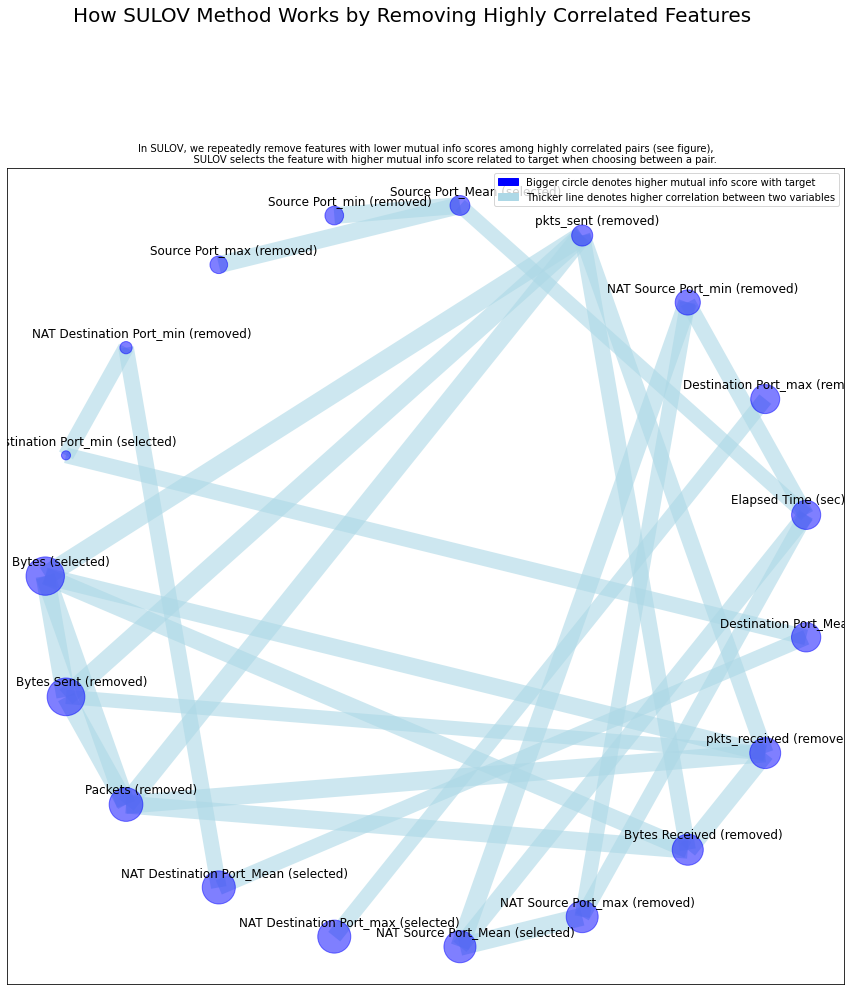

    Adding 0 categorical variables to reduced numeric variables  of 18
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 18 
    Finding Important Features using Boosted Trees algorithm...
        using 18 variables...
        using 14 variables...
        using 10 variables...
        using 6 variables...
        using 2 variables...
Selected 16 important features from your dataset
    Time taken (in seconds) = 54
Returning list of 16 important features and dataframe.


In [ ]:
from featurewiz import featurewiz
features = featurewiz(dfx, target='Action', corr_limit=0.70, verbose=2)

In [ ]:
features

(['Packets_count',
  'Packets_Mean',
  'NAT Source Port',
  'Destination Port_min',
  'Destination Port_count',
  'NAT Destination Port',
  'Destination Port',
  'NAT Destination Port_count',
  'Bytes',
  'NAT Source Port_count',
  'NAT Destination Port_Mean',
  'NAT Source Port_Mean',
  'NAT Destination Port_max',
  'Packets_max',
  'Packets_min',
  'Source Port_Mean'],
        Packets_count  Packets_Mean  ...  Source Port_Mean  Action
 0            15045.0      6.772682  ...         29.663043       0
 1            15045.0      6.772682  ...         10.000000       1
 2             8252.0     58.398449  ...         30.000000       0
 3            15045.0      6.772682  ...          0.000000       2
 4             8252.0     58.398449  ...       1358.500000       0
 ...              ...           ...  ...               ...     ...
 45864         8252.0     58.398449  ...         30.400000       0
 45866         8252.0     58.398449  ...          0.000000       0
 45867        15045.0  

In [ ]:
df_sulov = dfx[['ID','Packets_count',
  'Packets_Mean',
  'NAT Source Port',
  'Destination Port_min',
  'Destination Port_count',
  'NAT Destination Port',
  'Destination Port',
  'NAT Destination Port_count',
  'Bytes',
  'NAT Source Port_count',
  'NAT Destination Port_Mean',
  'NAT Source Port_Mean',
  'NAT Destination Port_max',
  'Packets_max',
  'Packets_min',
  'Source Port_Mean',
  'Action',
  'Bytes Sent', 'Bytes Received','Elapsed Time (sec)']]

dft_sulov = dft[['ID','Packets_count',
  'Packets_Mean',
  'NAT Source Port',
  'Destination Port_min',
  'Destination Port_count',
  'NAT Destination Port',
  'Destination Port',
  'NAT Destination Port_count',
  'Bytes',
  'NAT Source Port_count',
  'NAT Destination Port_Mean',
  'NAT Source Port_Mean',
  'NAT Destination Port_max',
  'Packets_max',
  'Packets_min',
  'Source Port_Mean',
  'Bytes Sent', 'Bytes Received','Elapsed Time (sec)']]

In [ ]:
df_sulov.head()

,ID,Packets_count,Packets_Mean,NAT Source Port,Destination Port_min,Destination Port_count,NAT Destination Port,Destination Port,NAT Destination Port_count,Bytes,NAT Source Port_count,NAT Destination Port_Mean,NAT Source Port_Mean,NAT Destination Port_max,Packets_max,Packets_min,Source Port_Mean,Action,Bytes Sent,Bytes Received,Elapsed Time (sec)
0,59276,15045.0,6.772682,54748.0,0.0,104.0,NaN,27015.0,NaN,78.0,3.0,NaN,142.333333,NaN,3600.0,0.0,29.663043,0,78.0,0.0,29.0
1,18986,15045.0,6.772682,NaN,0.0,469.0,0.0,25174.0,12300.0,66.0,NaN,1.066341,NaN,201.0,3600.0,0.0,10.000000,1,66.0,0.0,0.0
2,11131,8252.0,58.398449,46751.0,0.0,6645.0,53.0,53.0,6460.0,220.0,2.0,31.374923,614.500000,90.0,1203.0,0.0,30.000000,0,90.0,130.0,30.0
3,57352,15045.0,6.772682,0.0,NaN,NaN,0.0,NaN,12300.0,66.0,12322.0,1.066341,1.002678,201.0,3600.0,0.0,NaN,2,66.0,0.0,NaN
4,17229,8252.0,58.398449,29773.0,0.0,106.0,NaN,6881.0,NaN,502.0,1.0,NaN,1200.000000,NaN,1203.0,0.0,1358.500000,0,150.0,352.0,1200.0


In [ ]:
df_sulov.columns

Index(['ID', 'Packets_count', 'Packets_Mean', 'NAT Source Port',
       'Destination Port_min', 'Destination Port_count',
       'NAT Destination Port', 'Destination Port',
       'NAT Destination Port_count', 'Bytes', 'NAT Source Port_count',
       'NAT Destination Port_Mean', 'NAT Source Port_Mean',
       'NAT Destination Port_max', 'Packets_max', 'Packets_min',
       'Source Port_Mean', 'Action', 'Bytes Sent', 'Bytes Received',
       'Elapsed Time (sec)'],
      dtype='object')

In [ ]:
from pycaret.classification import *
exp_clf = setup(dfx,
                target='Action',
                use_gpu = False,
                numeric_imputation = 'mean', #median
                categorical_imputation = 'mode', #constant
                numeric_features = ['Bytes', 'Bytes Sent', 'Bytes Received','Elapsed Time (sec)'],
                categorical_features = ['Source Port', 'Destination Port', 'NAT Source Port','NAT Destination Port', 'Packets', 'pkts_sent', 'pkts_received'],
                #date_features = [],
                ignore_features = ['ID'],
                #ordinal_features = {'column_name' : [‘low’, ‘medium’, ‘high’] },
                high_cardinality_features = ['Source Port', 'Destination Port', 'NAT Source Port','NAT Destination Port'],
                #high_cardinality_method = 'frequency', #clustering,
                #group_features = [],
                handle_unknown_categorical = True,
                #unknown_categorical_method = 'least_frequent', or 'most_frequent',
                combine_rare_levels = True,
                #bin_numeric_features = ['0','1'],
                transformation = True,
                #transformation_method = 'yeo-johnson',#'quantile',yeo-johnson,
                #transform_target = True,
                #transform_target_method = 'yeo-johnson', #box-cox
                feature_selection = True,
                normalize = True,
                #normalize_method = 'zscore',#minmax ,maxabs ,robust, zscore,
                #fix_imbalance = True,
                #pca = True,
                #pca_method = 'incremental', #kernel, incremental, linear
                feature_interaction = False,
                feature_ratio = False,
                trigonometry_features=False,
                polynomial_features = False,)

,Description,Value
0,session_id,3165
1,Target,Action
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3"
4,Original Data,"(27208, 13)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,True


In [ ]:
lgbm = create_model('lightgbm')
predict_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9853,0.9916,0.7363,0.9854,0.9853,0.9747,0.9747
1,0.9927,0.9996,0.7420,0.9921,0.9924,0.9873,0.9873
2,0.9496,0.9582,0.7022,0.9488,0.9486,0.9125,0.9131
3,0.9932,0.9999,0.7425,0.9937,0.9934,0.9882,0.9882
4,0.9921,0.9994,0.7423,0.9911,0.9916,0.9864,0.9864
5,0.9926,0.9997,0.7422,0.9932,0.9929,0.9873,0.9873
6,0.9926,0.9992,0.7420,0.9926,0.9926,0.9873,0.9873
7,0.9900,0.9974,0.7409,0.9906,0.9903,0.9828,0.9828
8,0.9937,1.0000,0.7435,0.9932,0.9934,0.9891,0.9892
9,0.9953,0.9997,0.7452,0.9948,0.9950,0.9918,0.9919


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9907,0.9997,0.7406,0.9907,0.9906,0.9839,0.984


,pkts_received_48.0,Packets_75.0,pkts_received_120.0,Packets_31.0,Packets_612.0,Elapsed Time (sec),pkts_received_356.0,pkts_received_16.0,pkts_sent_187.0,pkts_received_65.0,Packets_171.0,Packets_436.0,pkts_sent_128.0,pkts_received_40.0,pkts_received_249.0,Packets_44.0,pkts_received_14.0,pkts_sent_9.0,Packets_74.0,pkts_received_313.0,pkts_sent_193.0,pkts_received_179.0,Packets_151.0,pkts_received_37.0,pkts_received_113.0,Packets_177.0,pkts_sent_32.0,pkts_sent_150.0,Packets_4.0,pkts_sent_30.0,Packets_79.0,Packets_7.0,pkts_received_71.0,pkts_sent_8.0,Packets_206.0,Packets_165.0,pkts_received_77.0,pkts_sent_152.0,pkts_sent_86.0,pkts_received_215.0,...,pkts_received_24.0,pkts_received_126.0,pkts_sent_3.0,pkts_sent_25.0,Packets_114.0,Packets_72.0,pkts_sent_137.0,pkts_received_6.0,pkts_received_36.0,Packets_19.0,Packets_69.0,Packets_128.0,Packets_152.0,pkts_sent_79.0,Packets_174.0,pkts_received_238.0,Packets_50.0,pkts_received_12.0,pkts_received_72.0,pkts_sent_90.0,Packets_123.0,pkts_sent_54.0,Packets_91.0,Packets_49.0,Packets_11.0,pkts_sent_44.0,Packets_115.0,pkts_received_149.0,Packets_148.0,pkts_received_34.0,Packets_25.0,pkts_sent_20.0,pkts_received_25.0,pkts_sent_22.0,pkts_received_45.0,Packets_26.0,pkts_sent_123.0,Action,Label,Score
0,0.0,0.0,0.0,0.0,0.0,1.114982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
1,0.0,0.0,0.0,0.0,0.0,0.130469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
2,0.0,0.0,0.0,0.0,0.0,-0.973677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.9933
3,0.0,0.0,0.0,0.0,0.0,-0.973677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0000
4,0.0,0.0,0.0,0.0,0.0,1.114982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,0.0,0.0,0.0,0.0,0.0,-0.973677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0000
8159,0.0,0.0,0.0,0.0,0.0,1.114982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
8160,0.0,0.0,0.0,0.0,0.0,-0.267764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
tuned_lgbm = tune_model(lgbm, optimize='F1')
predict_model(tuned_lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9927,0.9995,0.7422,0.9921,0.9924,0.9873,0.9873
1,0.9921,0.9997,0.7418,0.9916,0.9919,0.9864,0.9864
2,0.9906,0.9995,0.7401,0.9901,0.9903,0.9837,0.9837
3,0.9942,0.9999,0.7436,0.9937,0.9940,0.9900,0.9901
4,0.9921,0.9995,0.7423,0.9911,0.9916,0.9864,0.9864
5,0.9926,0.9997,0.7425,0.9927,0.9926,0.9873,0.9873
6,0.9926,0.9999,0.7423,0.9921,0.9924,0.9873,0.9873
7,0.9932,0.9998,0.7427,0.9927,0.9929,0.9882,0.9882
8,0.9932,0.9999,0.7433,0.9927,0.9929,0.9882,0.9882
9,0.9953,0.9996,0.7452,0.9948,0.9950,0.9918,0.9919


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9909,0.9998,0.741,0.9903,0.9906,0.9843,0.9844


,pkts_received_48.0,Packets_75.0,pkts_received_120.0,Packets_31.0,Packets_612.0,Elapsed Time (sec),pkts_received_356.0,pkts_received_16.0,pkts_sent_187.0,pkts_received_65.0,Packets_171.0,Packets_436.0,pkts_sent_128.0,pkts_received_40.0,pkts_received_249.0,Packets_44.0,pkts_received_14.0,pkts_sent_9.0,Packets_74.0,pkts_received_313.0,pkts_sent_193.0,pkts_received_179.0,Packets_151.0,pkts_received_37.0,pkts_received_113.0,Packets_177.0,pkts_sent_32.0,pkts_sent_150.0,Packets_4.0,pkts_sent_30.0,Packets_79.0,Packets_7.0,pkts_received_71.0,pkts_sent_8.0,Packets_206.0,Packets_165.0,pkts_received_77.0,pkts_sent_152.0,pkts_sent_86.0,pkts_received_215.0,...,pkts_received_24.0,pkts_received_126.0,pkts_sent_3.0,pkts_sent_25.0,Packets_114.0,Packets_72.0,pkts_sent_137.0,pkts_received_6.0,pkts_received_36.0,Packets_19.0,Packets_69.0,Packets_128.0,Packets_152.0,pkts_sent_79.0,Packets_174.0,pkts_received_238.0,Packets_50.0,pkts_received_12.0,pkts_received_72.0,pkts_sent_90.0,Packets_123.0,pkts_sent_54.0,Packets_91.0,Packets_49.0,Packets_11.0,pkts_sent_44.0,Packets_115.0,pkts_received_149.0,Packets_148.0,pkts_received_34.0,Packets_25.0,pkts_sent_20.0,pkts_received_25.0,pkts_sent_22.0,pkts_received_45.0,Packets_26.0,pkts_sent_123.0,Action,Label,Score
0,0.0,0.0,0.0,0.0,0.0,1.114982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9998
1,0.0,0.0,0.0,0.0,0.0,0.130469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
2,0.0,0.0,0.0,0.0,0.0,-0.973677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.9872
3,0.0,0.0,0.0,0.0,0.0,-0.973677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9992
4,0.0,0.0,0.0,0.0,0.0,1.114982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,0.0,0.0,0.0,0.0,0.0,-0.973677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9999
8159,0.0,0.0,0.0,0.0,0.0,1.114982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
8160,0.0,0.0,0.0,0.0,0.0,-0.267764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
#traing on the whole dataset
finalize_model(lgbm)
#predictiing on test data
test_predictions = predict_model(lgbm, data=dft)
#storing the predictions in another dataframe and converting the dataframe to a csv file.

In [ ]:
test_predictions.rename(columns = {'Label':'Action'}, inplace = True)
subx = test_predictions[['ID','Action']]
subx.Action.replace([0, 1, 2, 3],['allow', 'deny', 'drop', 'reset-both'], inplace=True)
subx.to_csv("sub5.csv",index=False)
subx.head()

,ID,Action
0,23127,drop
1,61535,allow
2,31457,allow
3,49294,allow
4,8826,deny


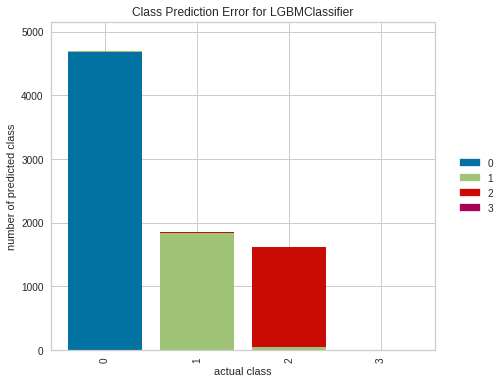

In [ ]:
plot_model(tuned_lgbm, plot='error')

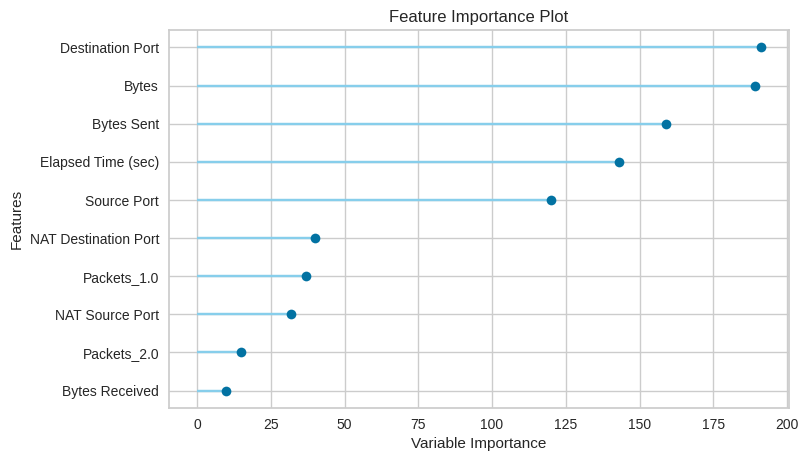

In [ ]:
plot_model(tuned_lgbm, plot='feature')